# Character Strings, Regular Expressions, and Web Scraping

# Textual Data
## Definition
• A character is a symbol in a written language - anything you can enter on a keyboard.

Examples: ‘Q’, ‘*’, ‘+’, ‘d’, ‘x’, ‘ ’, ‘{’ etc.

• A string is a sequence of characters.

Examples: ‘Columbia University’, ‘cat, squirrel, hedgehog’, etc.

In [1]:
mode('d')

[1] "character"

In [2]:
mode('cat, squirrel')

[1] "character"

## Whitespace
As noted above, whitespace ‘ ’ is considered a character and multiple spaces ‘ ’ a string

In [3]:
mode(" ")

[1] "character"

In [4]:
nchar(" "); nchar("  "); nchar("")

[1] 1

[1] 2

[1] 0

## Special Characters
• Quotes within a string: \\"

• Tab: \\t

• New Line: \\n

## If strings are elements of an object,
• length()返回一个object中字符串的数量，并非字符串中character的数量

• nchar()返回字符串中character的数量

• nchar() is vectorized, like most R function

In [5]:
# 一共一个长字符串
length("cat, squirrel, hedgehog")

# 三个字符串储存于一个数组中，所以长度为3
length(c("cat", "squirrel", "hedgehog"))

# 长字符串中一共23个字符，包括标点与空格
nchar("cat, squirrel, hedgehog") # Not 25

# 一个数组中包含三个字符串，由于nchar() is vectorized， 因此分别返回各自的字符数
nchar(c("cat", "squirrel", "hedgehog"))

[1] 1

[1] 3

[1] 23

[1] 3 8 8

## Printing Strings

• 可以使用print()，但经常使用cat()直接print character strings，因为cat()强制将输入的部分内容转换为字符串，所以在可能报错的时候实用。

In [6]:
cat("cat, squirrel")

x <- 6
y <- 7
cat("I have", x, "cats and", y, "hedgehogs as pets.")

cat, squirrelI have 6 cats and 7 hedgehogs as pets.

In [7]:
print("cat, \n squirrel")
0
cat("cat, \nsquirrel")
0
cat("cat, \n squirrel")

[1] "cat, \n squirrel"


[1] 0

cat, 
squirrel

[1] 0

cat, 
 squirrel

In [8]:
print("In R, an \"array\" is a multi-dimension matrix.")
0
cat("A group of hedgehogs is called an \"array\".")

[1] "In R, an \"array\" is a multi-dimension matrix."


[1] 0

A group of hedgehogs is called an "array".

## Task

Use print() and cat() to print the following in R: "Columbia\tUniversity"

In [9]:
print("Columbia\tUniversity")
cat("Columbia\tUniversity")

[1] "Columbia\tUniversity"
Columbia	University

## Substrings
• 一个子字符串(substring)是从一个更大的字符串中提取的小字符串，但它本身也是一个字符串。

• 注意，我们不能使用通常的切片方法（例如[[]]或[]）进行这种提取，因为 字符串并不是vector或list。

• substr()函数可以提取或者改变字符串中的某一部分。

• substr(string, start = , stop = )返回给定字符串中从start至stop位置的substring。

In [10]:
# 提取从位置8到位置12的子字符串
phrase <- "Christmas Bonus"
substr(phrase, start = 8, stop = 12)

[1] "as Bo"

In [11]:
# 将字符串中位于位置13的字符替换为"g"
substr(phrase, start = 13, stop = 13) <- "g"
phrase

[1] "Christmas Bogus"

In [12]:
# substr()支持向量操作(vector operation)
fav_animals <- c("cat", "squirrel", "hedgehog")

# 对于数组中每个元素，分别提取从位置1到位置2的子字符串
substr(fav_animals, start = 1, stop = 2)

# 对于数组中每个元素，分别提取倒数两个字符
substr(fav_animals, nchar(fav_animals)-1, nchar(fav_animals))

# 对于数组中每个元素，分别提取位于位置4的字符
substr(fav_animals, start = 4, stop = 4)

[1] "ca" "sq" "he"

[1] "at" "el" "og"

[1] ""  "i" "g"

## Dividing Strings into Vectors

strsplit(string, split)函数将输入的字符串，按输入split的pattern进行分割，并储存在list中。

In [13]:
todo <- "Lecture, Lab, Homework"
strsplit(todo, split = ",")

# 去除空格
strsplit(todo, split = ", ")

[[1]]
[1] "Lecture"   " Lab"      " Homework"

[[1]]
[1] "Lecture"  "Lab"      "Homework"

In [14]:
# 对于输入的一个vector，pattern将循环作用于其每一个元素。
todo <- "Lecture, Lab, Homework"
strsplit(c(todo, "Midterm, Final"), split = ",")

# 可以发现返回的是一个list
mode(strsplit(c(todo, "Midterm, Final"), split = ","))

[[1]]
[1] "Lecture"   " Lab"      " Homework"

[[2]]
[1] "Midterm" " Final"

[1] "list"

## Tasks
• Make a vector of three elements which are "Columbia", "slumber party", and"sugarplum". Make a call to substr() that returns the "lum" from each element of the vector. The output should be "lum" "lum" "lum"

• Use strsplit() on the vector you created splitting on "lum". Output should be a list of length three

In [15]:
task1 <- c("Columbia", "slumber party", "sugarplum")
substr(task1, start = c(3, 2, 7), stop = c(5, 4, 9))

[1] "lum" "lum" "lum"

In [16]:
strsplit(task1, split = "lum")

[[1]]
[1] "Co"  "bia"

[[2]]
[1] "s"         "ber party"

[[3]]
[1] "sugarp"

## Building Strings from Multiple Parts

paste()函数将许多字符串连接为一个长字符串。

### 注意！如果目的是想将输入的字符串直接连接，则字符串应该分别输入，而不应该以vector的形式输入！例如paste(c('a', 'b', 'c'))和paste('a', 'b', 'c')是不同的！

In [17]:
# 将三个字符串以默认空格的方式连接
paste("cat", "squirrel", "hedgehog")

# 将三个字符串直接连qw接
paste("cat", "squirrel", "hedgehog", sep = "")

# 将三个字符串以“逗号加一个空格”的方式连接
paste("cat", "squirrel", "hedgehog", sep = ", ")

# 将三个字符串与1：3中匹配的各项以默认空格的方式分别连接
paste(c("cat", "squirrel", "hedgehog"), 1:3)

# 将三个字符串与1：2中匹配的各项以默认空格的方式分别连接
# 注意到此处1：2仅有两个元素，故第三个字符串重新再与1以空格连接
paste(c("cat", "squirrel", "hedgehog"), 1:2)

[1] "cat squirrel hedgehog"

[1] "catsquirrelhedgehog"

[1] "cat, squirrel, hedgehog"

[1] "cat 1"      "squirrel 2" "hedgehog 3"

[1] "cat 1"      "squirrel 2" "hedgehog 1"

In [18]:
# 此处，"("和")"分别代表(和)的字符，所以后半部分实际上是(, 1:3, )，可以视作：
# (, 1, ) 和 (, 2, ) 和 (, 3, )
# 因此，这是将三个字符串分别与(, 1, ) 和 (, 2, ) 和 (, 3, )以默认空格的方式连接
paste(c("cat", "squirrel", "hedgehog"), "(", 1:3, ")")

# 这里去除了默认的空格连接方式。注意！由此可知，上一句代码返回的结果中，( 1 )中的空格
# 并非是代码中的空格所带来，而是默认方式所带来。代码中的空格只是为了美观。
paste(c("cat", "squirrel", "hedgehog"), "(", 1:3, ")", sep = "")

# 注意到，这里比比上一句代码在(之前多了一个空格，这个空格起作用的原因是它在字符串中，
# 而并非是美观的空格。因此我们去除了默认的空格连接方式，人为地使字母与括号以空格分开。
paste(c("cat", "squirrel", "hedgehog"), " (", 1:3, ")", sep = "")

[1] "cat ( 1 )"      "squirrel ( 2 )" "hedgehog ( 3 )"

[1] "cat(1)"      "squirrel(2)" "hedgehog(3)"

[1] "cat (1)"      "squirrel (2)" "hedgehog (3)"

# Exercise
What happens when you pass a vector to the sep argument?

In [19]:
paste(c("cat", "squirrel", "hedgehog"), " (", 1:3, ")", sep = c(" ","","%"))

# 这里发现，如果向sep中pass一个vector，只会以vector的第一项进行连接

[1] "cat  ( 1 )"      "squirrel  ( 2 )" "hedgehog  ( 3 )"

## Condensing Multiple Strings

paste()函数也可以使用collapse参数将多个字符串进行重新压缩连接，即，可以先加入vector并以sep的方式进行分别连接，然后再把多个字符串以新的方式连接成一个长字符串。

In [20]:
paste(c("cat", "squirrel", "hedgehog"), " (", 1:3, ")", sep = "")

paste(c("cat", "squirrel", "hedgehog"), " (", 1:3, ")", sep = "", collapse = "; ")

paste(c("a", "b", "c"), collapse = "%")

[1] "cat (1)"      "squirrel (2)" "hedgehog (3)"

[1] "cat (1); squirrel (2); hedgehog (3)"

[1] "a%b%c"

## Task

Use paste() with its first input being c("Columbia", "slumberparty", "sugarplum") along with the sep and collapse arguments to create the following string:

"Columbia [3-5]; slumberparty [2-4]; sugarplum [7-9]".

In [21]:
paste(c("Columbia", "slumberparty", "sugarplum"), 
      c("[3-5]", "[2-4]", "[7-9]"), collapse = "; ")

# 或者等价地
paste(c("Columbia", "slumberparty", "sugarplum"), 
     " [",c(3,2,7),"-",c(5,4,9),"]", sep = "", collapse = "; ")

[1] "Columbia [3-5]; slumberparty [2-4]; sugarplum [7-9]"

[1] "Columbia [3-5]; slumberparty [2-4]; sugarplum [7-9]"

## Searching Strings

In [22]:
HC <- readLines("HonorCode2.txt", warn = FALSE)
length(HC)

[1] 43

In [23]:
head(HC, 5)

print(head(HC, 5)) # 可以发现HC实际上是一个list

[1] "Students should be aware that academic dishonesty (for example, plagiarism, cheating on an"  
[2] "examination, or dishonesty in dealing with a faculty member or other University official) or"
[3] "the threat of violence or harassment are particularly serious offenses and will be dealt"    
[4] "with severely under Dean's Discipline."                                                      
[5] ""

[1] "Students should be aware that academic dishonesty (for example, plagiarism, cheating on an"  
[2] "examination, or dishonesty in dealing with a faculty member or other University official) or"
[3] "the threat of violence or harassment are particularly serious offenses and will be dealt"    
[4] "with severely under Dean's Discipline."                                                      
[5] ""                                                                                            


HC是一个vector，其中每一项分别为HonorCode2.txt中每一行的文字。

grep(pattern, x)函数在由字符串组成的vector x中，搜索由pattern给定的子字符串。
grepl(pattern, HC)函数在由字符串组成的vector x中，搜索由pattern给定的子字符串，若搜索成功返回TRUE，失败则返回FALSE，并总体以vector的形式返回.

In [24]:
# 在vector HC中搜索"students"，并返回其所在vector HC中的位置（行数）
grep("students", HC) 

grep("Students", HC)

is.vector(grepl("students", HC))
grepl("students", HC)

[1]  6 15 23 30

[1]  1 19 33

[1] TRUE

[1] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[25] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [25]:
grep("student", HC)

HC[grep("students", HC)]

[1]  6 12 15 23 30

[1] "Graduate students are expected to exhibit the high level of personal and academic integrity" 
[2] "In practical terms, students must not cheat on examinations, and deliberate plagiarism is of"
[3] "Graduate students are responsible for proper citation and paraphrasing, and must also take"  
[4] "All incoming doctoral and master's students in the Arts and Sciences at Columbia are"

## Task:
Using functions we’ve learned today, let’s make HC a vector with each element a word of the Honor Code (instead of a line of text). Of course, could do this with scan()

In [26]:
# 我的方法一：
my_HC <- c()
for(row in HC){
    new_row <- strsplit(row, split = c(" "))
    for(char in new_row){
        my_HC <- append(my_HC, char)
    }
}

head(my_HC, 5)
length(my_HC)

[1] "Students" "should"   "be"       "aware"    "that"

[1] 442

In [27]:
# 老师的方法：

new_HC1 <- paste(HC, collapse = " ")
HC.words <- strsplit(new_HC1, split = " ")[[1]]

head(HC.words, 5)
length(HC.words)

[1] "Students" "should"   "be"       "aware"    "that"

[1] 450

In [28]:
# 两方法求出的length不一样的原因在于，老师的方法把"也算作了字符，作以下检验：
my_HC[47]

HC.words[47]
HC.words[48]

[1] "Graduate"

[1] ""

[1] "Graduate"

### 可以用table()函数统计单词数目

In [29]:
word_count <- table(HC.words)
word_count <- sort(word_count, decreasing = TRUE)
head(word_count, 10)

HC.words
 and   of   or  the   to   in      from    a   is 
  23   17   16   13   11   10    8    6    5    5 

在这里，我们又一次发现了问题所在，例如第七多的字符串是null string。并且标点符号与大小写（例如"Students"和"students"）使得我们计数混乱。

In [30]:
# Undesired things:
tail(word_count, 10)

HC.words
violence    vital    which    words     work   works.    world    write 
       1        1        1        1        1        1        1        1 
 Writing     your 
       1        1 

## Task
Use grep() to search over names(word_count) to find the number of words in the word count vector that have semi-colons in them. Hint:";" should be one of your arguments to grep. Using your result print the words that grep() finds.

In [31]:
sum(grepl(pattern = ";", names(word_count)))
word_count[grep(pattern = ";", names(word_count))]

[1] 5

HC.words
  citations;     online); others'work;       paper;    scholars; 
           1            1            1            1            1 

## Summary
• nchar(): Finds the length of a string.

• substr(): Extracts substrings and substitutes.

• strsplit(): Turns strings into vectors.

• paste(): Turns vectors into a string.

• grep(): Searches for patterns in a string and returns a vector of indices.

• grepl(): Searches for patterns in a string and returns a vector of logicals.

# Regular Expressions
We want to search for text patterns instead of text constants. We can do this with regular expressions.

## Why do we need Regular Expressions

In [32]:
fav_animals <- "cat,squirrel, hedgehog, octopus"
strsplit(fav_animals, split = ",")

[[1]]
[1] "cat"       "squirrel"  " hedgehog" " octopus"

In [33]:
fav_animals <- "cat,squirrel, hedgehog,    octopus"
strsplit(fav_animals, split = ",")

[[1]]
[1] "cat"         "squirrel"    " hedgehog"   "    octopus"

In [34]:
strsplit(fav_animals, split = " ")

[[1]]
[1] "cat,squirrel," "hedgehog,"     ""              ""             
[5] ""              "octopus"

In [35]:
fav_animals <- "cat,squirrel, hedgehog,    octopus"
strsplit(fav_animals, split = ",    ")

[[1]]
[1] "cat,squirrel, hedgehog" "octopus"

## Regular Expressions

• Regular expressions are a method of expressing patterns in character strings.

• Used to match sets of strings or patterns of strings in R.

• Can express ideas like match "this and then that", "either this or that","this repeated some number of times".

• Regular expressions are rules expressed in a grammar with special symbols.

## Rules for Regular Expressions

1. Every string is a regular expression.

        • "cat" matches "categorize" and "dogs and cats".
        • "cat" does not match "Dog is man's best friend" and "work doggedly".

2. Can represent OR with a vertical bar |.

        • "cat|dog|Dog" matches all of the above.

3. Precede special characters like | with a backslash \ to match exactly.

        • "A\|b" matches "P(A|b)".
        • "A|b" matches twice in "Alabama" and twice in "blueberry".
        
4. Indicate sets of characters with brackets [].

        • "[a-z]" matches any lower case letters.
        • "[:punct:]" matches all punctuation marks.
        
5. The caret ˆ negates a character range when in the leading position.

        • "[ˆaeiou]" matches any characters except lower-case vowels.
        
6. The period . stands for any character and doesn’t need brackets.

        • "c..s" matches "cats", "class", "c88s", "c  s", etc  
        
7. The dollar sign $ means that a pattern only matches at the end of a line.

        • "[a-z,]$" matches strings ending in lower-case letters or a comma.
        
2. The caret ˆ outside of brackets means that a pattern only matches at the beginning of a line.
        • "ˆ[ˆA-Z]" matches strings not beginning with capital letters.

In [36]:
# "match" means in R:
grep("cat|dog", c("categorize", "work doggedly"))

grep("A|b", c("Alabama", "blueberry", "work doggedly"))

[1] 1 2

[1] 1 2

## Quantifiers can be used to tell “how often” an expression occurs.

• Quantifiers apply to the last character before they appear.

• Any valid expression can be enclosed in parentheses for grouping.

|Quantifier Description | (Match if the expression is ...)|
|---|---|
|+ | Repeated one or more times.|
|* | Repeated zero or more times.|
|? | Repeated zero or one times.|
|{n} | Repeated exactly n times.|
|{n, } | Repeated n or more times.|
|{n, m} | Repeated between n and m times.|

## Examples

• "[0-9][0-9][a-zA-Z]+" matches strings with two digits followed by one or more letters.

• "(abc){3}" matches three consecutive occurrences of "abc".

• "abc{3}" matches "abccc".

• "M[rs][rs]?\.?" matches "Mr", "Ms", "Mrs", "Mr.", "Ms.", "Mrs.".

• The above also matches "Mrr", "Msr", "Mss", "Mrr.", "Msr.", "Mss." (and nothing else).

## Regular Expressions in R

• Many R functions we’ve already seen take regular expressions as their arguments.

• strsplit() can use a regular expression to divide a string into a vector.

• grep() can search for patterns represented by regular expressions in a string.

In [37]:
# Without regular expressions we get weird results when we try to count words:
head(word_count, 10)

tail(word_count, 10)

HC.words
 and   of   or  the   to   in      from    a   is 
  23   17   16   13   11   10    8    6    5    5 

HC.words
violence    vital    which    words     work   works.    world    write 
       1        1        1        1        1        1        1        1 
 Writing     your 
       1        1 

In [38]:
HC <- readLines("HonorCode2.txt", warn = FALSE)

length(HC)
head(HC, 5)

[1] 43

[1] "Students should be aware that academic dishonesty (for example, plagiarism, cheating on an"  
[2] "examination, or dishonesty in dealing with a faculty member or other University official) or"
[3] "the threat of violence or harassment are particularly serious offenses and will be dealt"    
[4] "with severely under Dean's Discipline."                                                      
[5] ""

In [39]:
# One long string
HC <- paste(HC, collapse = " ")

# [[:punct:]] 在r中为代表任意符号的正则表达式，[[:space:]]代表空格
HC.words <- strsplit(HC, split = "(\\s|[[:punct:]])+")[[1]]
head(HC.words, 30)

[1] "Students"    "should"      "be"          "aware"       "that"       
 [6] "academic"    "dishonesty"  "for"         "example"     "plagiarism" 
[11] "cheating"    "on"          "an"          "examination" "or"         
[16] "dishonesty"  "in"          "dealing"     "with"        "a"          
[21] "faculty"     "member"      "or"          "other"       "University" 
[26] "official"    "or"          "the"         "threat"      "of"

## Exercise
In the previous we have the following problem: university’s splits to university and s

Check that split = "\\s+|([[:punct:]]+[[:space:]]+)" gives us what we want: either any number of white spaces or at least one punctuation mark followed by at least one space.

In [40]:
# 发现有一项前面有(，因为代码的规则是：标点一次或多次 + 空格一次或多次，虽然匹配了
# 标点，但没有匹配空格，因此与regex代码不匹配，(则被无视
substr(HC, start = 1, stop = 102)

HC.words <- strsplit(HC, split = "\\s+|([[:punct:]]+[[:space:]]+)")[[1]]
head(HC.words, 30)

[1] "Students should be aware that academic dishonesty (for example, plagiarism, cheating on an examination"

[1] "Students"    "should"      "be"          "aware"       "that"       
 [6] "academic"    "dishonesty"  "(for"        "example"     "plagiarism" 
[11] "cheating"    "on"          "an"          "examination" "or"         
[16] "dishonesty"  "in"          "dealing"     "with"        "a"          
[21] "faculty"     "member"      "or"          "other"       "University" 
[26] "official"    "or"          "the"         "threat"      "of"

In [41]:
# 如果稍作修改，把“空格一次或多次”换成“空格零次或多次”呢？
# 会发现还是不对，结果中会出现一项""，代表空值，为什么会这样？
# 出错处对应的这句话是：dishonesty (for example, plagiarism
# 虽然看似这样改动能解决问题，但是，regex在dishonesty后面的空格后断开，剩下：
# (for example, plagiarism。regex紧接着匹配到(，在(处又断开，但(前面已经没有字符了，
# 所以在前面会出现""这个空值。

HC.words <- strsplit(HC, split = "\\s+|([[:punct:]]+[[:space:]]*)")[[1]]
head(HC.words, 30)

[1] "Students"    "should"      "be"          "aware"       "that"       
 [6] "academic"    "dishonesty"  ""            "for"         "example"    
[11] "plagiarism"  "cheating"    "on"          "an"          "examination"
[16] "or"          "dishonesty"  "in"          "dealing"     "with"       
[21] "a"           "faculty"     "member"      "or"          "other"      
[26] "University"  "official"    "or"          "the"         "threat"

In [42]:
# 例如以下regex，也会出现空值，因为断开处是a，而a为首项
strsplit("abcde", split = '[a]')

[[1]]
[1] ""     "bcde"

In [43]:
# 解决办法
substr(HC, start = 1, stop = 102)

HC.words <- strsplit(HC, split = "\\s+[[:punct:]]*|([[:punct:]]+[[:space:]]*)")[[1]]
head(HC.words, 30)

[1] "Students should be aware that academic dishonesty (for example, plagiarism, cheating on an examination"

[1] "Students"    "should"      "be"          "aware"       "that"       
 [6] "academic"    "dishonesty"  "for"         "example"     "plagiarism" 
[11] "cheating"    "on"          "an"          "examination" "or"         
[16] "dishonesty"  "in"          "dealing"     "with"        "a"          
[21] "faculty"     "member"      "or"          "other"       "University" 
[26] "official"    "or"          "the"         "threat"      "of"

In [44]:
quakes <- readLines("NCEDC_Search_Results.html", warn = FALSE)
head(quakes)

tail(quakes)

quakes[8:15]

[1] "<HTML><HEAD><TITLE>NCEDC_Search_Results</TITLE></HEAD><BODY>Your search parameters are:<ul>"
[2] "<li>catalog=ANSS"                                                                           
[3] "<li>start_time=2002/01/01,00:00:00"                                                         
[4] "<li>end_time=2016/01/01,00:00:00"                                                           
[5] "<li>minimum_magnitude=6.0"                                                                  
[6] "<li>maximum_magnitude=10"

[1] "2015/12/19 02:10:53.36 -18.3819  169.3857  10.00  6.00   Mw       22    3 0.87  us  201512192005"
[2] "2015/12/20 18:47:35.53   3.6384  117.6310   6.93  6.10   Mw       70    2 0.81  us  201512202043"
[3] "2015/12/24 19:44:03.13 -55.7550 -123.1158  12.28  6.20   Mw       36   28 1.24  us  201512242033"
[4] "2015/12/25 19:14:47.17  36.4872   71.1308 206.00  6.30   Mw       17    1 0.94  us  201512252045"
[5] "</PRE>"                                                                                          
[6] "</BODY></HTML>"

[1] "</ul>"                                                                                           
[2] "<PRE>"                                                                                           
[3] "Date       Time             Lat       Lon  Depth   Mag Magt  Nst Gap  Clo  RMS  SRC   Event ID"  
[4] "----------------------------------------------------------------------------------------------"  
[5] "2002/01/01 10:39:06.82 -55.2140 -129.0000  10.00  6.00   Mw   78          1.07  NEI 200201014017"
[6] "2002/01/01 11:29:22.73   6.3030  125.6500 138.10  6.30   Mw  236          0.90  NEI 200201014018"
[7] "2002/01/02 14:50:33.49 -17.9830  178.7440 665.80  6.20   Mw  215          1.08  NEI 200201024034"
[8] "2002/01/02 17:22:48.76 -17.6000  167.8560  21.00  7.20   Mw  427          0.90  NEI 200201024041"

## Tasks
• Get rid of the first few lines of HTML formatting code and search parameters.

• Actual data begins on line 12. Headers on line 11.

• Strategy: all data lines begin with a date in format YYYY/MM/DD.

In [45]:
new_quakes <- quakes[grep(pattern = "^\\d{4}/\\d{2}/\\d{2}", quakes)]
head(new_quakes)
tail(new_quakes)

[1] "2002/01/01 10:39:06.82 -55.2140 -129.0000  10.00  6.00   Mw   78          1.07  NEI 200201014017"
[2] "2002/01/01 11:29:22.73   6.3030  125.6500 138.10  6.30   Mw  236          0.90  NEI 200201014018"
[3] "2002/01/02 14:50:33.49 -17.9830  178.7440 665.80  6.20   Mw  215          1.08  NEI 200201024034"
[4] "2002/01/02 17:22:48.76 -17.6000  167.8560  21.00  7.20   Mw  427          0.90  NEI 200201024041"
[5] "2002/01/03 07:05:27.67  36.0880   70.6870 129.30  6.20   Mw  431          0.87  NEI 200201034024"
[6] "2002/01/03 10:17:36.30 -17.6640  168.0040  10.00  6.60   Mw  386          1.14  NEI 200201034040"

[1] "2015/12/09 12:58:01.78 -16.7374  175.2475  10.00  6.10   Mw       65    3 0.80  us  201512092066"
[2] "2015/12/17 19:49:53.15  15.8044  -93.6269  85.95  6.60   Mw       35    0 1.37  us  201512172041"
[3] "2015/12/19 02:10:53.36 -18.3819  169.3857  10.00  6.00   Mw       22    3 0.87  us  201512192005"
[4] "2015/12/20 18:47:35.53   3.6384  117.6310   6.93  6.10   Mw       70    2 0.81  us  201512202043"
[5] "2015/12/24 19:44:03.13 -55.7550 -123.1158  12.28  6.20   Mw       36   28 1.24  us  201512242033"
[6] "2015/12/25 19:14:47.17  36.4872   71.1308 206.00  6.30   Mw       17    1 0.94  us  201512252045"

In [46]:
# What are we leaving behind?
grep(quakes, pattern = "^\\d{4}/\\d{2}/\\d{2}", invert = TRUE, value = TRUE)

[1] "<HTML><HEAD><TITLE>NCEDC_Search_Results</TITLE></HEAD><BODY>Your search parameters are:<ul>"   
 [2] "<li>catalog=ANSS"                                                                              
 [3] "<li>start_time=2002/01/01,00:00:00"                                                            
 [4] "<li>end_time=2016/01/01,00:00:00"                                                              
 [5] "<li>minimum_magnitude=6.0"                                                                     
 [6] "<li>maximum_magnitude=10"                                                                      
 [7] "<li>event_type=E"                                                                              
 [8] "</ul>"                                                                                         
 [9] "<PRE>"                                                                                         
[10] "Date       Time             Lat       Lon  Depth   Mag Magt  Nst Gap  Clo  RMS  SRC   Event ID"
[11] "----------------------------------------------------------------------------------------------"
[12] "</PRE>"                                                                                        
[13] "</BODY></HTML>"

## Task
• We just extracted the lines we need by noting that they all begin with a date. The lines we need also seem to all end in an event i.d. which is a 12 digit code. Use this idea with grep() to extract the lines of actual data.

• This won’t work – we leave behind some data lines. What happened?

• How else could we search for the data using regular expressions?

In [47]:
# 这种方法会丢失几项
new_quakes1 <- grep(pattern = "\\d{12}$", quakes, value = TRUE)

length(new_quakes)
length(new_quakes1)

# 用which()函数可以锁定第一个不匹配出现在第116项，发现new_quakes的第116项出现了缺失值
new_quakes[116]
new_quakes1[116]

[1] 2269

[1] 2254

[1] "2002/10/23 11:27:19.43  63.5144 -147.9116   4.20  6.36   ML  114          0.87  AK              "

[1] "2002/10/24 06:08:37.98  -1.8840   29.0040  11.00  6.20   Mw  345          1.05  NEI 200210244059"

## More Commands in the grep() Family
All return information about where regular expressions are matched in a string.

| functions | results |
| :--- | :--- |
| grepl() | returns a logical indicating a match. |
| regexpr() | returns the location of the first match with attributes like the length of the match. |
| gregexpr() | works similarly to regexpr(), but returns all matching locations. ‘g’ for global. |
| regmatches() | takes strings and the output of regexpr() or gregexpr() and returns the actual matching strings. |

## Examples

In [48]:
# Is there a match?
grepl("a[a-z]", "Alabama")

# Information about the first match.
regexpr("a[a-z]", "Alabama")
print(regexpr("a[a-z]", "Alabama")) # 可以发现regexpr返回的结果比较特殊，但不是list

# Information on all matches.
gregexpr("a[a-z]", "Alabama")
is.list(gregexpr("a[a-z]", "Alabama")) # 这里发现，gregexpr()返回的结构是list

# What are the matches?
regmatches("Alabama", gregexpr("a[a-z]", "Alabama"))

[1] TRUE

[1] 3
attr(,"match.length")
[1] 2
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

[1] 3
attr(,"match.length")
[1] 2
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE


[[1]]
[1] 3 5
attr(,"match.length")
[1] 2 2
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

[1] TRUE

[[1]]
[1] "ab" "am"

In [54]:
# Let’s Extract the (longitude, latitude) Pairs
# 我的代码：

new_quakes2 <- c()
for(row in quakes){
    row_data <- regmatches(row, gregexpr("(-?\\d+\\.\\d{4})", row))
    new_quakes2 <- append(new_quakes2, row_data[[1]][1])
    new_quakes2 <- append(new_quakes2, row_data[[1]][2])
}

location_matrix <- matrix(na.omit(new_quakes2), ncol = 2, byrow = TRUE)

colnames(location_matrix) <- c("Latitude", "Longitude")
head(location_matrix)

Latitude,Longitude
-55.2140,-129.0000
6.3030,125.6500
-17.9830,178.7440
-17.6000,167.8560
36.0880,70.6870
-17.6640,168.0040


In [60]:
# 用sapply()也能实现

full_exp <- "-?\\d+\\.\\d{4}\\s+-?\\d+\\.\\d{4}"

right_place <- grepl(pattern = full_exp, quakes)

matches <- regmatches(quakes[right_place], gregexpr(full_exp, quakes[right_place]))

location_vec <- sapply(matches, strsplit, split = "\\s+")
location_vec <- unlist(location_vec)

location_matrix1 <- matrix(location_vec, ncol = 2, byrow = TRUE)
colnames(location_matrix1) <- c("Latitude", "Longitude")

head(location_matrix1)

[[1]]
[1] 24
attr(,"match.length")
[1] 18
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

[[2]]
[1] 26
attr(,"match.length")
[1] 16
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

[[3]]
[1] 24
attr(,"match.length")
[1] 18
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

[[4]]
[1] 24
attr(,"match.length")
[1] 18
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

[[5]]
[1] 25
attr(,"match.length")
[1] 17
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

[[6]]
[1] 24
attr(,"match.length")
[1] 18
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

Latitude,Longitude
-55.2140,-129.0000
6.3030,125.6500
-17.9830,178.7440
-17.6000,167.8560
36.0880,70.6870
-17.6640,168.0040


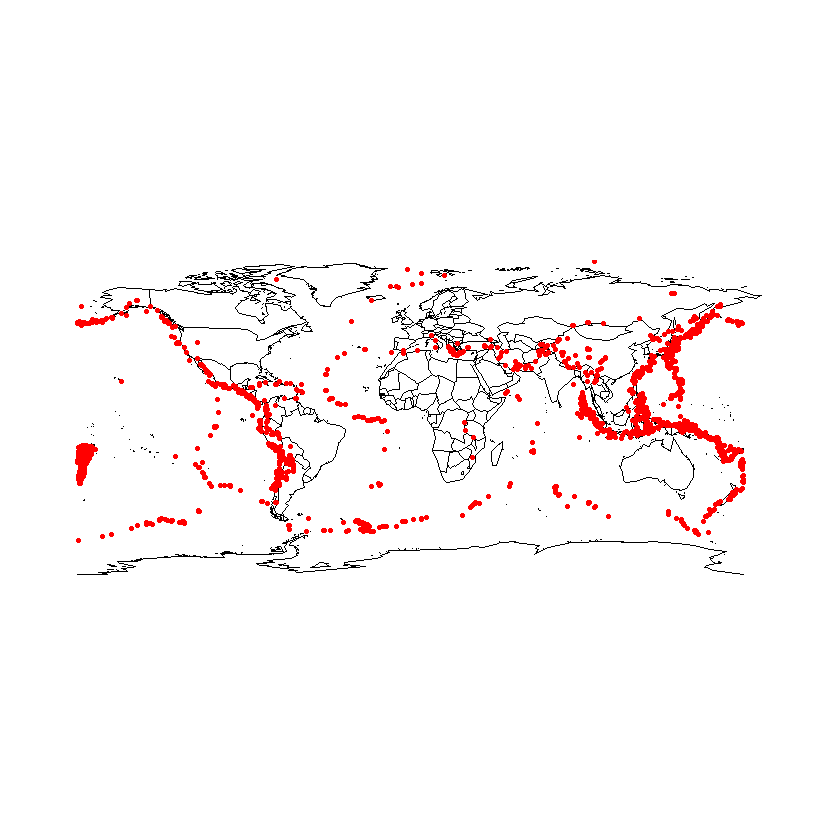

In [51]:
library(maps)

map("world")
points(location_matrix[,"Longitude"], location_matrix[,"Latitude"], 
       pch = 19, col = "red", cex = .5)

# What is Web Scraping?

• We’ve learned about getting data in and out of R when it's structured: read.table(), read.csv(), etc.

• Often, like the last example, it's not as structured.

• Could have metadata.

• Non-tabular arrangement.

• In general this is true of data on the web.

• Webpages are generally designed for humans to read.

• Use a computer to extract the information we actually want.

• Iterate the process.

## Strategy
• Read in line-by-line and split into a nicer format (generally requires a lot of regular expressions).

• Take in unstructured pages, return rigidly-formatted data.

## How do we use the computer extract the information we want?
• Information is somewhere in the page source, usually in the HTML code.

• Often some sort of marker or pointer surrounding the data (again, usually HTML).

• Pick apart the HTML to leave the data using regular expressions.

## How do we pick apart HTML code with regular expressions?
• What exactly do we want from the page?

• How is the page organized? Where is the information we want located?

• How does it show up on the webpage?

• How is that represented in the HTML?

• Write a function to automate the information extraction.

• Now iterate over relevant pages.
